<a href="https://colab.research.google.com/github/stepjuly-pixel/Sales-Data-Analysis-Workflow/blob/main/data_analysis_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Data overview

- Uploading and describing datasets.
- Finding key columns.
- Transforming column names to uniform format.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Uploading dataset 1

file_id = "1C1fysxZ2iugxQ-fFFqxGWl3AMpXhOnTR"
url = f"https://drive.google.com/uc?id={file_id}"

df_events = pd.read_csv(url)
df_events.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [ ]:
# Uploading dataset 2

file_id = "1CV54MzUknAnRBZ10xhAmizCRA9QN6Gjo"
url = f"https://drive.google.com/uc?id={file_id}"

df_products = pd.read_csv(url)
df_products.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [ ]:
# Uploading dataset 3

file_id = "1wnSBbk3RAlob888TKRcmmAtoPSXFT8EC"
url = f"https://drive.google.com/uc?id={file_id}"

df_countries = pd.read_csv(url)
df_countries.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
# Descibing dataset Events

df_events.describe()

,Order ID,Product ID,Units Sold,Unit Price,Unit Cost
count,1.330000e+03,1330.000000,1328.000000,1330.000000,1330.000000
mean,5.412048e+08,5788.096241,4952.201807,264.893541,187.246812
std,2.573882e+08,2820.728878,2905.198996,217.323460,176.158873
min,1.006406e+08,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,3127.000000,2356.750000,81.730000,35.840000
50%,5.387164e+08,5988.000000,4962.000000,154.060000,97.440000
75%,7.544628e+08,8681.000000,7459.500000,437.200000,263.330000
max,9.998797e+08,8969.000000,9999.000000,668.270000,524.960000


In [ ]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


In [ ]:
# Descibing dataset Products

df_products.describe()

,id
count,12.000000
mean,5802.166667
std,2937.985452
min,1270.000000
25%,2959.000000
50%,6659.500000
75%,8390.000000
max,8969.000000


In [ ]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [ ]:
# Descibing dataset Countries

df_countries.describe()

,name,alpha-2,alpha-3,region,sub-region
count,249,248,249,248,248
unique,249,248,249,5,17
top,Afghanistan,AF,AFG,Africa,Sub-Saharan Africa
freq,1,1,1,60,53


In [ ]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


Table's connection:
- Events['Order ID'] = Products['id']
- Countries['alpha-3'] = Events['Country Code']

In [ ]:
# Transforming column names to uniform format

df_events.columns = df_events.columns.str.lower().str.replace(' ', '_')
df_products.columns = df_products.columns.str.lower().str.replace(' ', '_')
df_countries.columns = df_countries.columns.str.lower().str.replace(' ', '_')

In [ ]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        1330 non-null   int64  
 1   order_date      1330 non-null   object 
 2   ship_date       1330 non-null   object 
 3   order_priority  1330 non-null   object 
 4   country_code    1248 non-null   object 
 5   product_id      1330 non-null   int64  
 6   sales_channel   1330 non-null   object 
 7   units_sold      1328 non-null   float64
 8   unit_price      1330 non-null   float64
 9   unit_cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


# 2) Data cleaning
- Looking for missing values ​​in each table.
- Filling in or removing missing values.
- Checking if all data types are recognized correctly.
- Examining the data for duplicates.
- Examining the data for anomalies.

**Working with missing values**

In [ ]:
# Persentage of plain values in Events

print(df_events.isna().sum() / df_events.shape[0] * 100)

order_id          0.000000
order_date        0.000000
ship_date         0.000000
order_priority    0.000000
country_code      6.165414
product_id        0.000000
sales_channel     0.000000
units_sold        0.150376
unit_price        0.000000
unit_cost         0.000000
dtype: float64


The proportion of missing values ​​exceeds 0.004, we cannot delete these values. We will fill the missing values ​​in *country_code* with the value "unknown", in the *units_sold* column we will fill with the average value.

In [ ]:
# Fill df_events['country_code'] with Unknown

df_events['country_code'] = df_events['country_code'].fillna('Unknown')

In [ ]:
# Fill df_events['units_sold'] with avg meaning

df_events['units_sold'] = df_events['units_sold'].fillna(df_events['units_sold'].mean())

In [ ]:
# Persentage of plain values in Products

print(df_products.isna().sum() / df_products.shape[0] * 100)

id           0.0
item_type    0.0
dtype: float64


In [ ]:
# Persentage of plain values in Countries

print(df_countries.isna().sum() / df_countries.shape[0] * 100)

name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


In [ ]:
print(df_countries.isna().sum())

name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64


In [ ]:
# Filter the values of missing rows to estimate their valuation

row_nan = df_countries[df_countries.isna().any(axis=1)]
print(row_nan)


           name alpha-2 alpha-3  region          sub-region
8    Antarctica      AQ     ATA     NaN                 NaN
153     Namibia     NaN     NAM  Africa  Sub-Saharan Africa


It is suggested to replace the NaN value in line 8 with "Antarctica", and the missing value in line 153 with "NM"

In [ ]:
# Check is code 'NM' free

df_countries_with_NM = df_countries[df_countries['alpha-2'] == 'NM']
print(df_countries_with_NM.shape[0])

0


In [ ]:
# Fill missing values in Countries

df_countries['region'] = df_countries['region'].fillna("Antarctica")
df_countries['sub-region'] = df_countries['sub-region'].fillna("Antarctica")
df_countries['alpha-2'] = df_countries['alpha-2'].fillna("NM")

**Checking and replacing data types**

In [ ]:
# Convert the date columns to datetime at Events
df_events["order_date"] = pd.to_datetime(df_events["order_date"])
df_events["ship_date"] = pd.to_datetime(df_events["ship_date"])

In [ ]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        1330 non-null   int64         
 1   order_date      1330 non-null   datetime64[ns]
 2   ship_date       1330 non-null   datetime64[ns]
 3   order_priority  1330 non-null   object        
 4   country_code    1330 non-null   object        
 5   product_id      1330 non-null   int64         
 6   sales_channel   1330 non-null   object        
 7   units_sold      1330 non-null   float64       
 8   unit_price      1330 non-null   float64       
 9   unit_cost       1330 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 104.0+ KB


**Finding duplicates in datasets**

In [ ]:
# Create Dictionary for similar Cirillic - Latin letters

replacements = str.maketrans({
    'А': 'A', 'В': 'B', 'Е': 'E', 'К': 'K', 'М': 'M', 'Н': 'H',
    'О': 'O', 'Р': 'P', 'С': 'C', 'Т': 'T', 'У': 'Y', 'Х': 'X',
    'а': 'a', 'е': 'e', 'о': 'o', 'с': 'c', 'р': 'p', 'х': 'x'
})

In [ ]:
# Normalazing datas in dataset Products

normalized = (
    df_products['item_type']
    .astype(str)
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
    .str.translate(replacements)
    .str.lower()
)

# Checking duplicates existing

duplicates_products = df_products[normalized.duplicated(keep=False)]

if not duplicates_products.empty:
    print("Duplicates found:")
    print(duplicates_products)
else:
    print("No duplicate found")

No duplicate found


In [ ]:
print(df_products)

      id        item_type
0   2103           Cereal
1   7940        Household
2   2455          Clothes
3   1270        Beverages
4   8681  Office Supplies
5   4594           Fruits
6   5988       Vegetables
7   7331        Baby Food
8   8875             Meat
9   8293        Cosmetics
10  8969           Snacks
11  3127    Personal Care


In [ ]:
# Normalazing the data in the list of columns of dataset Events

text_cols = ['order_priority', 'country_code', 'sales_channel']

df_events_normalized = df_events.copy()

for col in text_cols:
    df_events_normalized[col] = (
        df_events_normalized[col]
        .astype(str)
        .str.strip()
        .str.replace(r'\s+', ' ', regex=True)
        .str.translate(replacements)
        .str.lower()
    )

# Checking duplicate existing
duplicates_events = df_events[df_events_normalized.duplicated(keep=False)]

if not duplicates_events.empty:
    print("Duplicates found:")
    print(duplicates_events)
else:
    print("No duplicate found")

No duplicate found


In [ ]:
# Normalazing the data in the list of columns of dataset Countries

text_col = ['name', 'alpha-2', 'alpha-3', 'region', 'sub-region']

df_countries_normalized = df_countries.copy()

for col in text_col:
    df_countries_normalized[col] = (
        df_countries_normalized[col]
        .astype(str)
        .str.strip()
        .str.replace(r'\s+', ' ', regex=True)
        .str.translate(replacements)
        .str.lower()
    )

# Checking duplicate existing
duplicates_countries = df_countries[df_countries_normalized.duplicated(keep=False)]

if not duplicates_countries.empty:
    print("Duplicates found:")
    print(duplicates_countries)
else:
    print("No duplicate found")

No duplicate found


No duplicates were found in the tables, we don't need to delete anything.

**Evaluate the data visually for anomalies**

In [ ]:
df_events.describe()

,order_id,order_date,ship_date,product_id,units_sold,unit_price,unit_cost
count,1.330000e+03,1330,1330,1330.000000,1330.000000,1330.000000,1330.000000
mean,5.412048e+08,2013-10-12 06:09:12.180451072,2013-11-06 00:46:33.383458816,5788.096241,4952.201807,264.893541,187.246812
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,2011-12-16 06:00:00,2012-01-03 00:00:00,3127.000000,2360.750000,81.730000,35.840000
50%,5.387164e+08,2013-10-17 00:00:00,2013-11-09 00:00:00,5988.000000,4958.000000,154.060000,97.440000
75%,7.544628e+08,2015-08-28 18:00:00,2015-10-03 18:00:00,8681.000000,7458.750000,437.200000,263.330000
max,9.998797e+08,2017-07-23 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000
std,2.573882e+08,NaN,NaN,2820.728878,2903.012170,217.323460,176.158873


In [ ]:
print(f"Median value 'unit_sold': {df_events['units_sold'].median()}\n")
print(f"Median value 'unit_pice': {df_events['unit_price'].median()}\n")
print(f"Median value 'unit_cost': {df_events['unit_cost'].median()}\n")

Median value 'unit_sold': 4958.0

Median value 'unit_pice': 154.06

Median value 'unit_cost': 97.44



Let's look at the value of the number of units sold *units_sold*. The median value is close to the mean, meaning the distribution of all data is normal without any outliers. There is a suspicious difference between the minimum and maximum values. Let's find out from which category the products with the maximum and minimum prices come.

In [ ]:
max_price_row = df_events[df_events['unit_price'] == df_events['unit_price'].max()]
print(f"Id of max price category: {max_price_row['product_id'].unique()}\n")

min_price_row = df_events[df_events['unit_price'] == df_events['unit_price'].min()]
print(f"Id of min price category: {min_price_row['product_id'].unique()}")

Id of max price category: [7940]

Id of min price category: [4594]


In [ ]:
print(f"Row with max price category:\n {df_products[df_products['id'] == 7940]}")
print(f"Row with min price category:\n {df_products[df_products['id'] == 4594]}")

Row with max price category:
      id  item_type
1  7940  Household
Row with min price category:
      id item_type
5  4594    Fruits


There is a large deviation in the values ​​in the *unit_price* column, but this is quite possible, considering that the products are from qualitatively different categories: fruit costs significantly less than expensive products from the Household category (e.g. household appliances, furniture, etc.)

There is a large difference between the median and the mean in the *unit_price* and *unit_cost* columns, with outliers. This deviation can be explained by the presence of products with different cost prices from different categories (as in the example above).

# 3) Data analysis and visualization
- Let's join three tables into one dataframe. Remove columns that are not needed for analysis. Rename columns if necessary.
- Let's analyze sales (revenue, expenses, profits, product popularity) and create appropriate visualizations in the context of:
  - product categories;
  - geografy (countries, regions);
  - sales channels (onlaine and offline).
- Analyze the time interval between the order and its shipment and make appropriate visualizations in the following sections:
  - product categories;
  - countries;
  - regions.
- Let's analyze whether profit depends on the time required to ship the goods. Will perform the necessary aggregations and visualizations for this.
- Let's analyze the dynamics of sales (over time) by product categories, countries, and regions using visualization, and identify the main trends.
- Let's analyze sales of goods by day of the week. Can some goods be considered seasonal?

**Joining tables**

In [ ]:
# Making copies of datasets

df_events_copy = df_events.copy()

In [ ]:
# Copy dataset and rename key_name column

df_products_copy = df_products.copy()
df_products_copy.rename(columns={'id': 'product_id'}, inplace=True)

In [ ]:
df_products_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  12 non-null     int64 
 1   item_type   12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [ ]:
# Copy dataset and rename key_name column

df_countries_copy = df_countries.copy()
df_countries_copy.rename(columns={'alpha-3': 'country_code'}, inplace=True)

In [ ]:
df_countries_copy.head()

,name,alpha-2,country_code,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
# Join to main dataset Events

df = pd.merge(df_events_copy, df_products_copy, on='product_id', how='left')
df = pd.merge(df, df_countries_copy, on='country_code', how='left')


In [ ]:
df.head()

,order_id,order_date,ship_date,order_priority,country_code,product_id,sales_channel,units_sold,unit_price,unit_cost,item_type,name,alpha-2,region,sub-region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,NO,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,RS,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,Household,NaN,NaN,NaN,NaN
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,ME,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,RS,Europe,Southern Europe


For further data analysis, we will not need the columns *order_priority*, *country_code*, *product_id*, *alpha-2*.

In [ ]:
# Delete columns

df = df.drop(columns=['order_priority', 'country_code', 'product_id', 'alpha-2'], axis=1)



It is necessary to rename the column names *item_type* and *name* to something more understandable.

In [ ]:
# Rename column name

df.rename(columns={'item_type' : 'category'}, inplace=True)
df.rename(columns={'name' : 'country'}, inplace=True)
df.head()

,order_id,order_date,ship_date,sales_channel,units_sold,unit_price,unit_cost,category,country,region,sub-region
0,100640618,2014-10-08,2014-10-18,Online,650.0,205.70,117.11,Cereal,Norway,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,Offline,1993.0,205.70,117.11,Cereal,Serbia,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,Online,4693.0,668.27,502.54,Household,NaN,NaN,NaN
3,102230632,2017-05-13,2017-06-13,Online,1171.0,109.28,35.84,Clothes,Montenegro,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,Offline,7648.0,47.45,31.79,Beverages,Serbia,Europe,Southern Europe


Unknown NaN values ​​appeared in the dataset, let's rename these values ​​to "unknown".

In [ ]:
print(df.isna().sum())

order_id          0
order_date        0
ship_date         0
sales_channel     0
units_sold        0
unit_price        0
unit_cost         0
category          0
country          82
region           82
sub-region       82
dtype: int64


In [ ]:
# Fill plain values

df = df.fillna('Unknown')

In [ ]:
df.head()

,order_id,order_date,ship_date,sales_channel,units_sold,unit_price,unit_cost,category,country,region,sub-region
0,100640618,2014-10-08,2014-10-18,Online,650.0,205.70,117.11,Cereal,Norway,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,Offline,1993.0,205.70,117.11,Cereal,Serbia,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,Online,4693.0,668.27,502.54,Household,Unknown,Unknown,Unknown
3,102230632,2017-05-13,2017-06-13,Online,1171.0,109.28,35.84,Clothes,Montenegro,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,Offline,7648.0,47.45,31.79,Beverages,Serbia,Europe,Southern Europe


Let's remove extra spaces in the new dataset, and check for correct letter layout.

In [ ]:
# Create Dictionary for similar Cirillic - Latin letters

replacements = str.maketrans({
    'А': 'A', 'В': 'B', 'Е': 'E', 'К': 'K', 'М': 'M', 'Н': 'H',
    'О': 'O', 'Р': 'P', 'С': 'C', 'Т': 'T', 'У': 'Y', 'Х': 'X',
    'а': 'a', 'е': 'e', 'о': 'o', 'с': 'c', 'р': 'p', 'х': 'x'
})

In [ ]:
# Normalazing the data in columns of dataset

text_cols = ['country', 'sales_channel', 'category','region', 'sub-region']

for col in text_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.strip()
        .str.replace(r'\s+', ' ', regex=True)
        .str.translate(replacements)
    )

In [ ]:
df['sales_channel'] = df['sales_channel'].replace('online', 'Online')

**Working with the key metrics of the company's performance: total number of orders, total profit, total number of countries covered.**


In [ ]:
# Create new values

df['total_revenue'] = df['units_sold']*df['unit_price']
df['total_cost'] = df['units_sold']*df['unit_cost']
df['total_profit'] = df['total_revenue'] - df['total_cost']

In [ ]:
df.head()

,order_id,order_date,ship_date,sales_channel,units_sold,unit_price,unit_cost,category,country,region,sub-region,total_revenue,total_cost,total_profit
0,100640618,2014-10-08,2014-10-18,Online,650.0,205.70,117.11,Cereal,Norway,Europe,Northern Europe,133705.00,76121.50,57583.50
1,100983083,2016-08-11,2016-08-11,Offline,1993.0,205.70,117.11,Cereal,Serbia,Europe,Southern Europe,409960.10,233400.23,176559.87
2,101025998,2014-07-18,2014-08-11,Online,4693.0,668.27,502.54,Household,Unknown,Unknown,Unknown,3136191.11,2358420.22,777770.89
3,102230632,2017-05-13,2017-06-13,Online,1171.0,109.28,35.84,Clothes,Montenegro,Europe,Southern Europe,127966.88,41968.64,85998.24
4,103435266,2012-08-11,2012-09-18,Offline,7648.0,47.45,31.79,Beverages,Serbia,Europe,Southern Europe,362897.60,243129.92,119767.68


In [ ]:
# Count main metrics

print(f"Загальна кількість замовлень: {df['order_id'].count()}\n")
print(f"Загальний дохід: {df['total_revenue'].sum():.2f}$\n")
print(f"Загальні витрати: {df['total_cost'].sum():.2f}$\n")
print(f"Загальний прибуток: {df['total_profit'].sum():.2f}$\n")
print(f"Загальна кількість охоплених країн: {df['country'].nunique()}\n")

Загальна кількість замовлень: 1330

Загальний дохід: 1704623436.08$

Загальні витрати: 1202781608.96$

Загальний прибуток: 501841827.12$

Загальна кількість охоплених країн: 46



**Analyzing sales (revenue, expenses, profits, product popularity) by product category, geography, and sales channels.**

Let's build a bar plot of profit by category with distribution by sales channels.

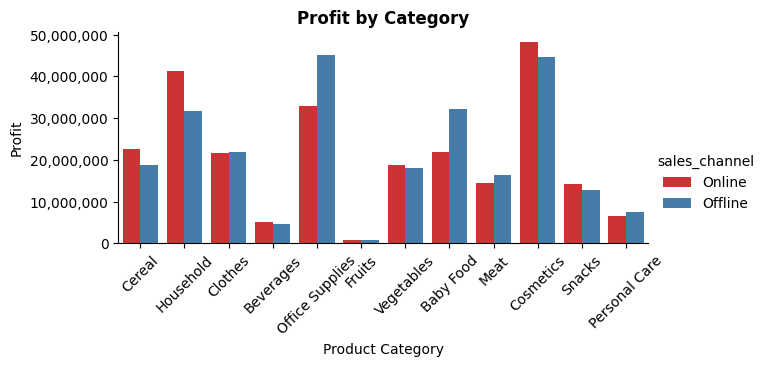

In [ ]:
# Bar plot with Catplot with hue
import matplotlib.ticker as mtick

sns.catplot(x="category", y='total_profit', data=df, kind="bar", estimator=sum, hue="sales_channel", errorbar=("ci", False), height=3, aspect=2, palette = "Set1")
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title("Profit by Category", fontweight="bold")
plt.xlabel("Product Category")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.show()

The distribution of profits by online and offline channels is more or less close in value. The most profitable category is *Cosmetics*, the least profitable is *Fruits*.

Let's build a horizontal bar graph of the top 10 countries by number of orders. Let's distribute the color intensity from the highest value to the lowest.

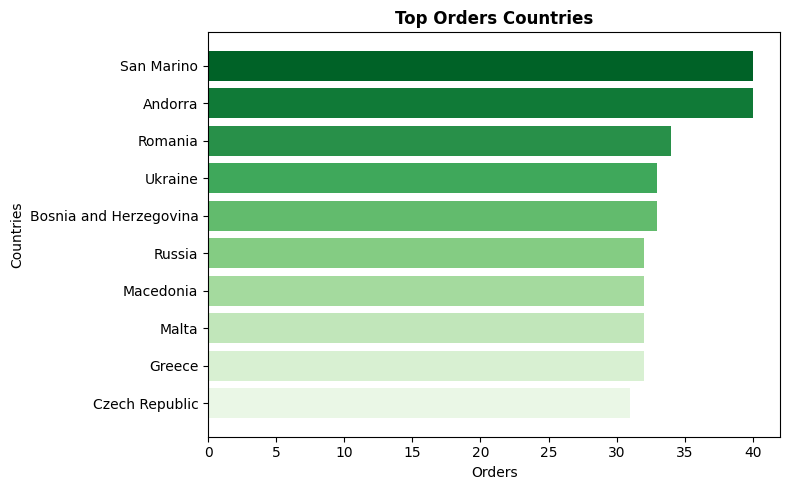

In [ ]:
# Group Orders count by Countries
top_orders_countries = df.groupby("country")["order_id"].count().nlargest(11).sort_values(ascending=True)
top_orders_countries = top_orders_countries.iloc[:10]

# Define a color palette for the bars
colors = sns.color_palette("Greens", len(top_orders_countries))

# Create bar graphs for top-selling products with different colors
plt.figure(figsize=(8, 5))
plt.barh(top_orders_countries.index, top_orders_countries.values, color=colors)
plt.xlabel("Orders")
plt.ylabel("Countries")
plt.title("Top Orders Countries", fontweight="bold")
plt.tight_layout()
plt.show()

The largest number of orders was made from countries: San Marino, Andorra, Romania, etc.

Let's build a bar chart with the accumulation of expenses and income by category.

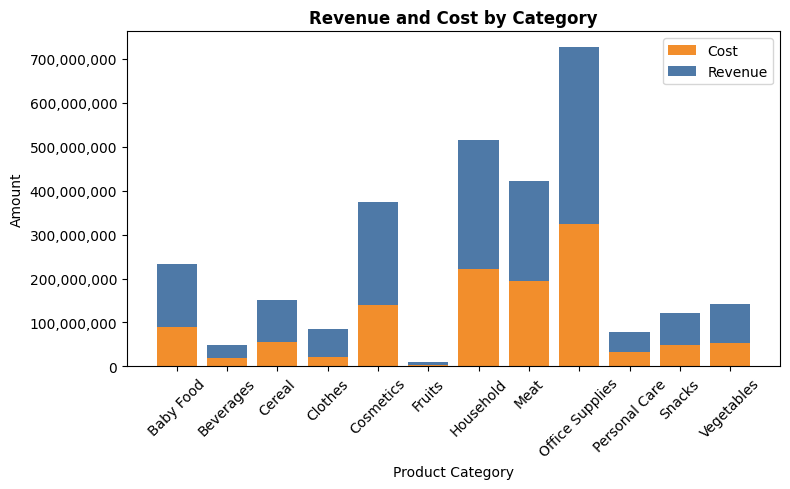

In [ ]:
# Group and define parameters Revenue and Costs by Categories

df_grouped = df.groupby("category", as_index=False)[["total_revenue", "total_cost"]].sum()

categories = df_grouped["category"]
revenue = df_grouped["total_revenue"]
cost = df_grouped["total_cost"]

x = range(len(categories))

# Buid stacked bar chart
plt.figure(figsize=(8, 5))
plt.bar(x, cost, label="Cost", color="#f28e2c")
plt.bar(x, revenue, bottom=cost, label="Revenue", color="#4e79a7")  # stacked поверх cost

ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Define axes and legends
plt.xticks(x, categories, rotation=45)
plt.ylabel("Amount")
plt.xlabel("Product Category")
plt.title("Revenue and Cost by Category", fontweight="bold")
plt.legend()
plt.tight_layout()
plt.show()

Income exceeds expenses. The highest level of income and expenses is in the *Office Supplies* category. The lowest income and expenses are observed in the *Fruits* category.

Let's build a pie chart of income distribution by sub-region.

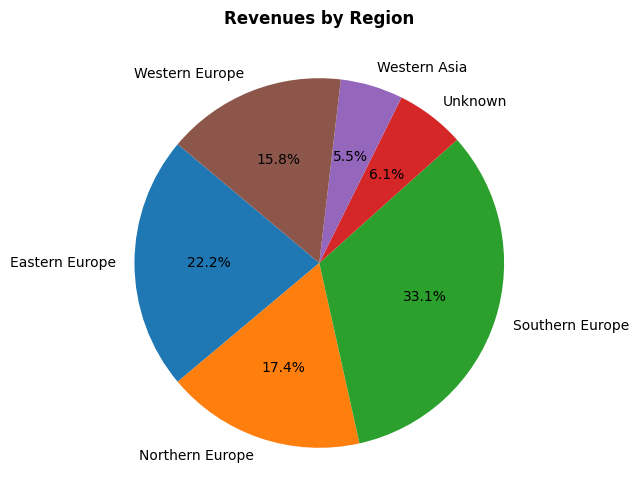

In [ ]:
# Group datas of Revenue by sub Region
df_revenue_region = df.groupby('sub-region')['total_revenue'].sum()

# Build Pie Chart with persentage labels
plt.figure(figsize=(6, 6))
plt.pie(
    df_revenue_region,
    labels=df_revenue_region.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Revenues by Region", fontweight="bold")
plt.ylabel("")
plt.show()

The region with the highest incomes is Southern Europe, and the region with the lowest is Western Asia.

Let's group the graphs on one dashboard.

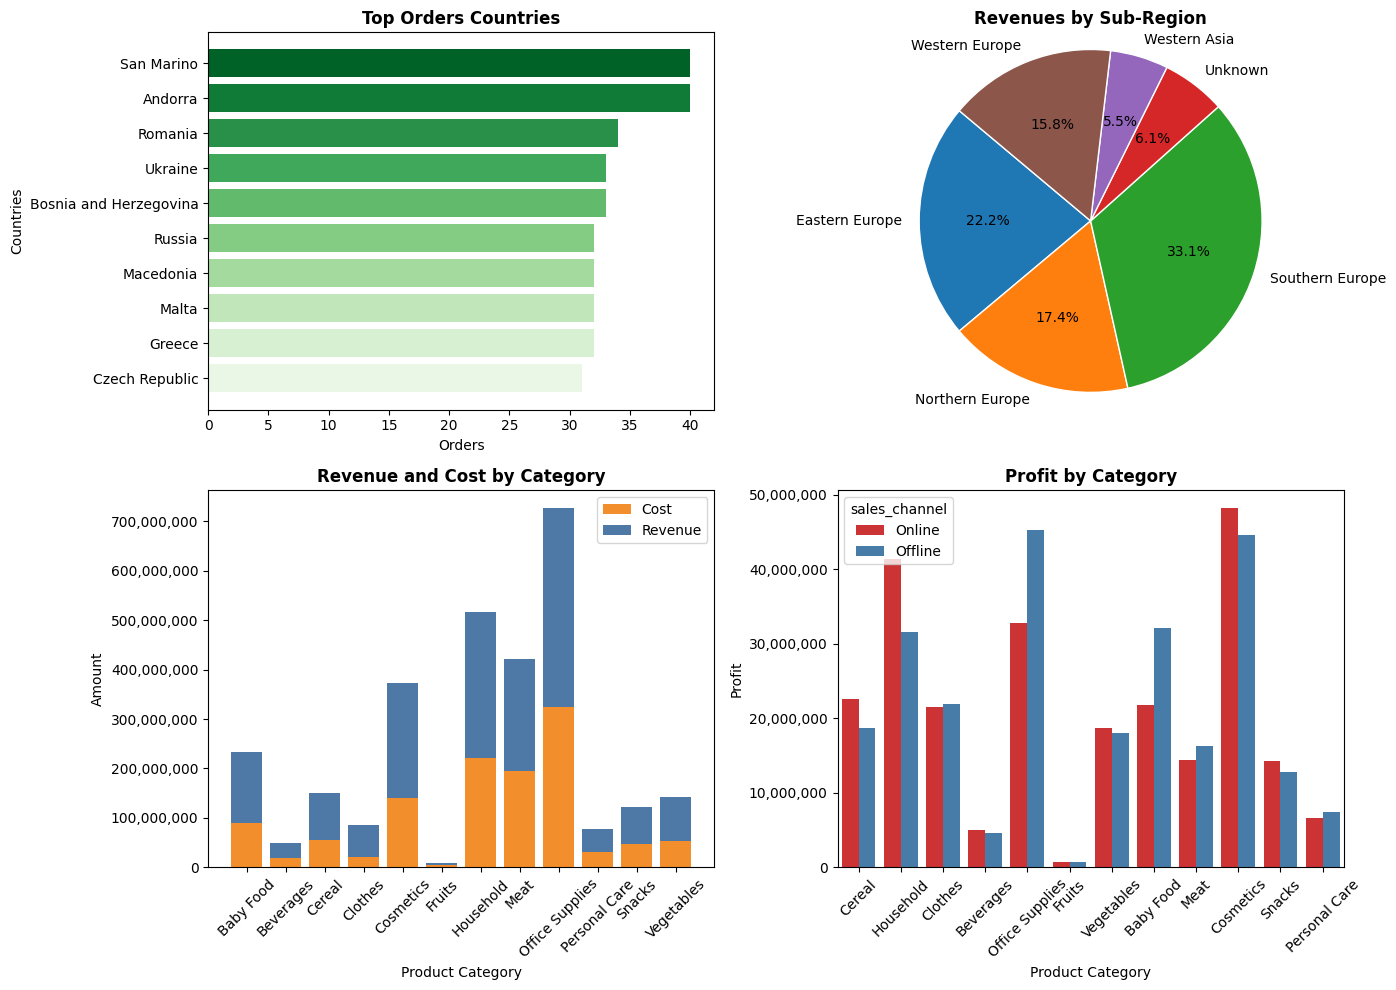

In [ ]:
import matplotlib.ticker as mtick

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# === 1. Top Orders Countries ===
top_orders_countries = df.groupby("country")["order_id"].count().nlargest(11).sort_values(ascending=True)
top_orders_countries = top_orders_countries.iloc[:10]
colors = sns.color_palette("Greens", len(top_orders_countries))

axs[0, 0].barh(top_orders_countries.index, top_orders_countries.values, color=colors)
axs[0, 0].set_xlabel("Orders")
axs[0, 0].set_ylabel("Countries")
axs[0, 0].set_title("Top Orders Countries", fontweight="bold")

# === 2. Revenue by Region ===
df_revenue_region = df.groupby('sub-region')['total_revenue'].sum()
axs[0, 1].pie(
    df_revenue_region,
    labels=df_revenue_region.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)
axs[0, 1].set_title("Revenues by Sub-Region", fontweight="bold")
axs[0, 1].axis('equal')

# === 3. Revenue and Cost by Category ===
df_grouped = df.groupby("category", as_index=False)[["total_revenue", "total_cost"]].sum()
categories = df_grouped["category"]
revenue = df_grouped["total_revenue"]
cost = df_grouped["total_cost"]
x = range(len(categories))

axs[1, 0].bar(x, cost, label="Cost", color="#f28e2c")
axs[1, 0].bar(x, revenue, bottom=cost, label="Revenue", color="#4e79a7")
axs[1, 0].yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(categories, rotation=45)
axs[1, 0].set_ylabel("Amount")
axs[1, 0].set_xlabel("Product Category")
axs[1, 0].set_title("Revenue and Cost by Category", fontweight="bold")
axs[1, 0].legend()

# === 4. Profit by Category ===
sns.barplot(
    x="category",
    y="total_profit",
    hue="sales_channel",
    data=df,
    estimator=sum,
    errorbar=None,
    palette="Set1",
    ax=axs[1, 1]
)
axs[1, 1].yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
axs[1, 1].set_title("Profit by Category", fontweight="bold")
axs[1, 1].set_xlabel("Product Category")
axs[1, 1].set_ylabel("Profit")
for label in axs[1, 1].get_xticklabels():
    label.set_rotation(45)

plt.tight_layout()
plt.show()

**Let's analyze the time interval between the order and its shipment.**

Let's analyze the time interval by category.

In [ ]:
# Count the number of days between shipping and ordering

df['interval'] = df['ship_date'] - df['order_date']
df['interval'] = df['interval'].dt.days
print(df['interval'])

0       10
1        0
2       24
3       31
4       38
        ..
1325     3
1326    28
1327     2
1328    18
1329    36
Name: interval, Length: 1330, dtype: int64


In [ ]:
# Group avg number of days by Category
interval_by_category = df.groupby('category')['interval'].mean().round(2)
print(interval_by_category)

category
Baby Food          26.34
Beverages          24.12
Cereal             27.18
Clothes            23.10
Cosmetics          25.91
Fruits             24.42
Household          23.94
Meat               25.85
Office Supplies    26.71
Personal Care      20.72
Snacks             25.54
Vegetables         23.49
Name: interval, dtype: float64


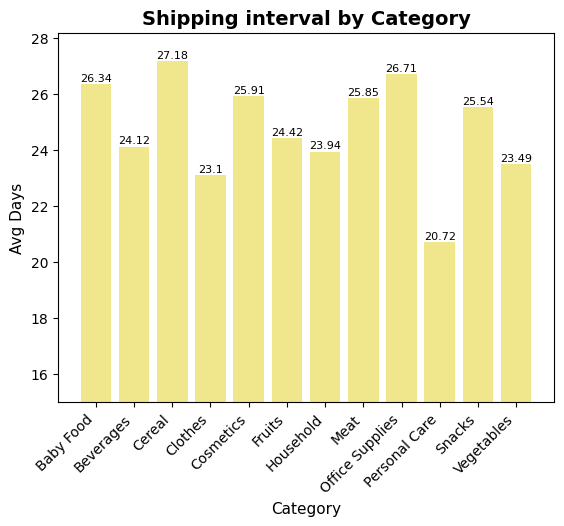

In [ ]:
# Build bar chart shipping interval by Category
bars = plt.bar(interval_by_category.index, interval_by_category.values, color="khaki")
plt.title("Shipping interval by Category", fontsize=14, fontweight="bold")
plt.xlabel("Category", fontsize=11)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Avg Days", fontsize=11)
plt.ylim(15, interval_by_category.values.max() +1)
# Add data labels
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.03,
        f"{bar.get_height()}",
        ha="center",
        va="bottom",
        color="black",
        fontsize=8,
    )
plt.show()

The largest delivery delays are observed in the *Office Supplies* and *Cereal* categories.

Let's analyze the time interval between delivery and order by country.

In [ ]:
# Group avg number of days by Countries

interval_by_country = df.groupby('country')['interval'].mean().round(2)


In [ ]:
interval_by_country_max = interval_by_country.nlargest(10)
print(interval_by_country_max)

country
Hungary       32.64
Georgia       29.70
Austria       28.50
Slovakia      28.47
Luxembourg    27.75
Lithuania     27.56
Poland        27.46
Russia        27.38
Monaco        26.85
Bulgaria      26.80
Name: interval, dtype: float64


In [ ]:
interval_by_country_min = interval_by_country.nsmallest(10).sort_values(ascending=False)
print(interval_by_country_min)

country
Greece            23.00
Liechtenstein     22.96
San Marino        21.70
Malta             21.56
Latvia            20.89
Serbia            20.59
Estonia           20.52
Denmark           19.69
United Kingdom    18.39
Croatia           18.22
Name: interval, dtype: float64


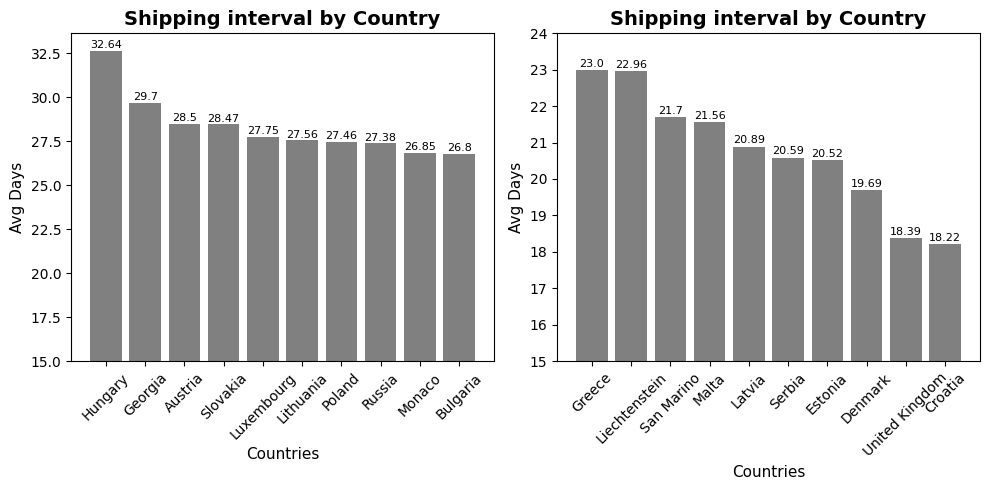

In [ ]:
# Create a figure with 1 row and 2 columns of subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Build Subplot1 bar chart
bars1 = ax[0].bar(interval_by_country_max.index, interval_by_country_max.values, color="grey")
ax[0].set_title("Shipping interval by Country", fontsize=14, fontweight="bold")
ax[0].set_xlabel("Countries", fontsize=11)
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].set_ylabel("Avg Days", fontsize=11)
ax[0].set_ylim(15, interval_by_country_max.values.max() +1)
# Add data labels
for bar in bars1:
    ax[0].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.03,
        f"{bar.get_height()}",
        ha="center",
        va="bottom",
        color="black",
        fontsize=8,
    )

# Build Subplot2 bar chart
bars2 = ax[1].bar(interval_by_country_min.index, interval_by_country_min.values, color="grey")
ax[1].set_title("Shipping interval by Country", fontsize=14, fontweight="bold")
ax[1].set_xlabel("Countries", fontsize=11)
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_ylabel("Avg Days", fontsize=11)
ax[1].set_ylim(15, interval_by_country_min.values.max() +1)
# Add data labels
for bar in bars2:
    ax[1].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.03,
        f"{bar.get_height()}",
        ha="center",
        va="bottom",
        color="black",
        fontsize=8,
    )

plt.tight_layout()

plt.show()

The longest time between order and delivery is in Hungary, and the shortest time is in Croatia.

Let's analyze the time interval between delivery and order by region.

In [ ]:
# Group avg number of days by Купшщт
interval_by_region = df.groupby('region')['interval'].mean().round(2)
print(interval_by_region)

region
Asia       26.09
Europe     24.78
Unknown    23.44
Name: interval, dtype: float64


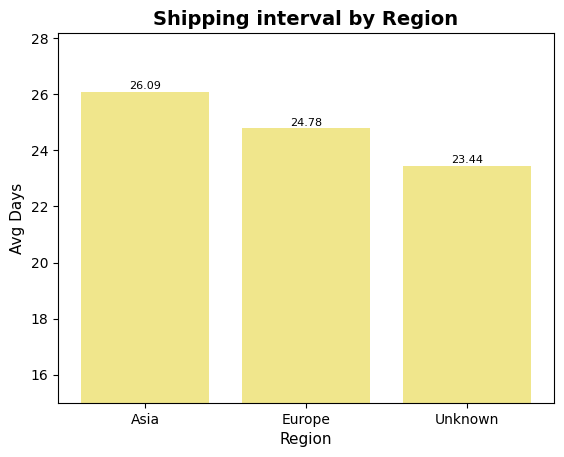

In [ ]:
# Build bar chart shipping interval by Region
bars = plt.bar(interval_by_region.index, interval_by_region.values, color="khaki")
plt.title("Shipping interval by Region", fontsize=14, fontweight="bold")
plt.xlabel("Region", fontsize=11)
plt.ylabel("Avg Days", fontsize=11)
plt.ylim(15, interval_by_category.values.max() +1)
# Add data labels
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.03,
        f"{bar.get_height()}",
        ha="center",
        va="bottom",
        color="black",
        fontsize=8,
    )
plt.show()

Delivery in Asia takes longer than in Europe.

**Let's analyze whether profit depends on the time required to ship the goods**

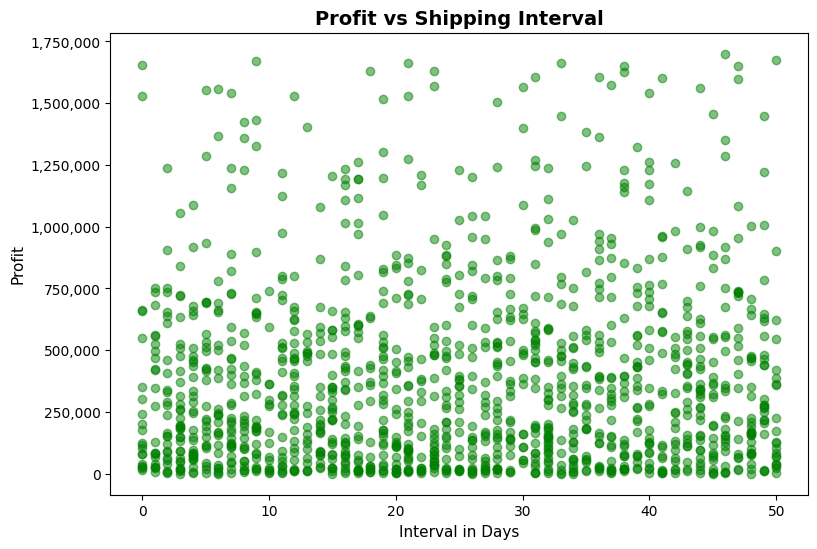

In [ ]:
# Build Scatter chart

plt.figure(figsize=(9, 6))

plt.scatter(df['interval'], df['total_profit'], color="green", alpha=0.5)
plt.title("Profit vs Shipping Interval", fontsize=14, fontweight="bold")
plt.xlabel("Interval in Days", fontsize=11)
plt.ylabel("Profit", fontsize=11)
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

There is no direct linear relationship between these indicators. Profit is distributed more or less evenly across the entire range - from 1 to 50 days. That is, delivery time does not significantly affect profit.

**Let's analyze sales dynamics (over time) by product categories, countries, and regions using visualization**

Let's build the first visualization of sales dynamics by category.

In [ ]:
df['order_month'] = df['order_date'].dt.to_period("M")
df['order_month'] = df['order_month'].dt.to_timestamp()

#Group Revenue by Month
sales_data_by_month = df.groupby(['order_month','category'])["total_revenue"].sum().reset_index()

#Filtered dates by 2 last years
sales_data_by_month_from2016 = sales_data_by_month[sales_data_by_month['order_month'] >= '2016-01-01']
print(sales_data_by_month_from2016)



    order_month         category  total_revenue
623  2016-01-01        Baby Food     1111489.12
624  2016-01-01        Beverages      230559.55
625  2016-01-01          Clothes     2415197.28
626  2016-01-01           Fruits       69042.00
627  2016-01-01        Household     3424215.48
..          ...              ...            ...
778  2017-07-01        Household     1821704.02
779  2017-07-01  Office Supplies     7714884.87
780  2017-07-01    Personal Care       98484.65
781  2017-07-01           Snacks     1793120.16
782  2017-07-01       Vegetables     2547228.04

[160 rows x 3 columns]


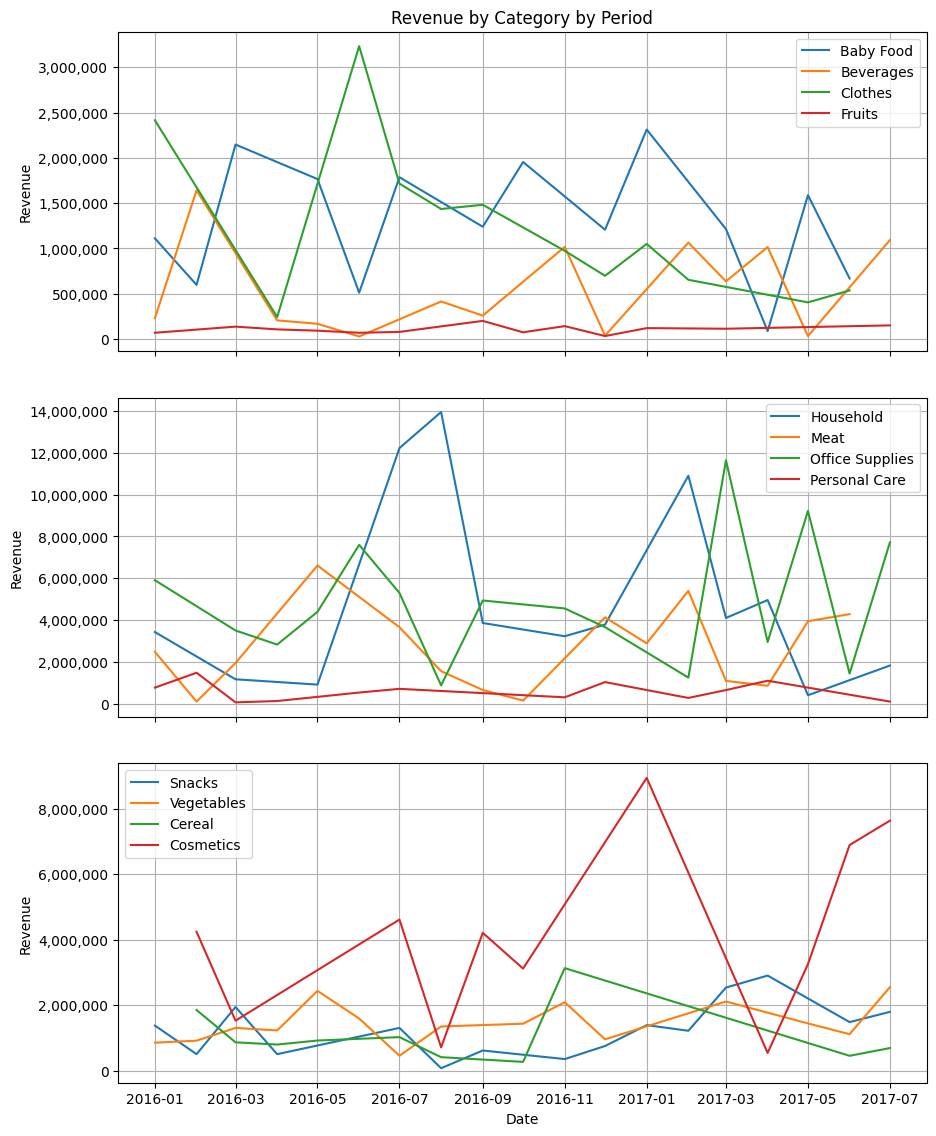

In [ ]:
# List of all Categories
categories = sales_data_by_month_from2016["category"].unique()

# Split Categories
group1 = categories[0:4]
group2 = categories[4:8]
group3 = categories[8:12]

fig, ax = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# First subplot
for category in group1:
    category_data = sales_data_by_month_from2016[sales_data_by_month_from2016["category"] == category]
    ax[0].plot(category_data["order_month"], category_data["total_revenue"], label=category)

ax[0].set_ylabel("Revenue")
ax[0].set_title("Revenue by Category by Period")
ax[0].yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax[0].legend()
ax[0].grid(True)


# Second subplot
for category in group2:
    category_data = sales_data_by_month_from2016[sales_data_by_month_from2016["category"] == category]
    ax[1].plot(category_data["order_month"], category_data["total_revenue"], label=category)

ax[1].set_ylabel("Revenue")
ax[1].yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax[1].legend()
ax[1].grid(True)

# Third subplot
for category in group3:
    category_data = sales_data_by_month_from2016[sales_data_by_month_from2016["category"] == category]
    ax[2].plot(category_data["order_month"], category_data["total_revenue"], label=category)

ax[2].set_xlabel("Date")
ax[2].set_ylabel("Revenue")
ax[2].yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax[2].legend()
ax[2].grid(True)

plt.subplots_adjust(hspace = 0.5)
plt.tight_layout(pad = 3.0)
plt.show()

Let's build a second visualization of sales dynamics by category.

In [ ]:
#Group Revenue by Month
sales_data_by_month_country = df.groupby(['order_month','country'])["total_revenue"].sum().reset_index()

#Filtered dates by 2 last years
sales_data_by_month_country_from2016 = sales_data_by_month_country[sales_data_by_month_country['order_month'] >= '2016-01-01']
print(sales_data_by_month_country_from2016)

     order_month      country  total_revenue
889   2016-01-01      Albania      938278.08
890   2016-01-01      Belarus      350934.00
891   2016-01-01      Belgium     5904521.07
892   2016-01-01      Estonia      781024.16
893   2016-01-01      Finland         503.82
...          ...          ...            ...
1116  2017-07-01   San Marino      381600.84
1117  2017-07-01        Spain     2889418.77
1118  2017-07-01       Sweden     3785714.80
1119  2017-07-01  Switzerland     3843862.40
1120  2017-07-01      Unknown     1750207.78

[232 rows x 3 columns]


Let's build a graph for the top 5 countries by profit for the period since 2016.

In [ ]:
# Find top 5 Countries by Revenue
top_countries = (
    sales_data_by_month_country_from2016
    .groupby("country")["total_revenue"]
    .sum()
    .drop('Unknown', errors="ignore") # Ignore values from Unknown
    .nlargest(5)
    .index
)

# Filtered by top
top_revenue_country_by_month = sales_data_by_month_country_from2016[sales_data_by_month_country_from2016["country"].isin(top_countries)]

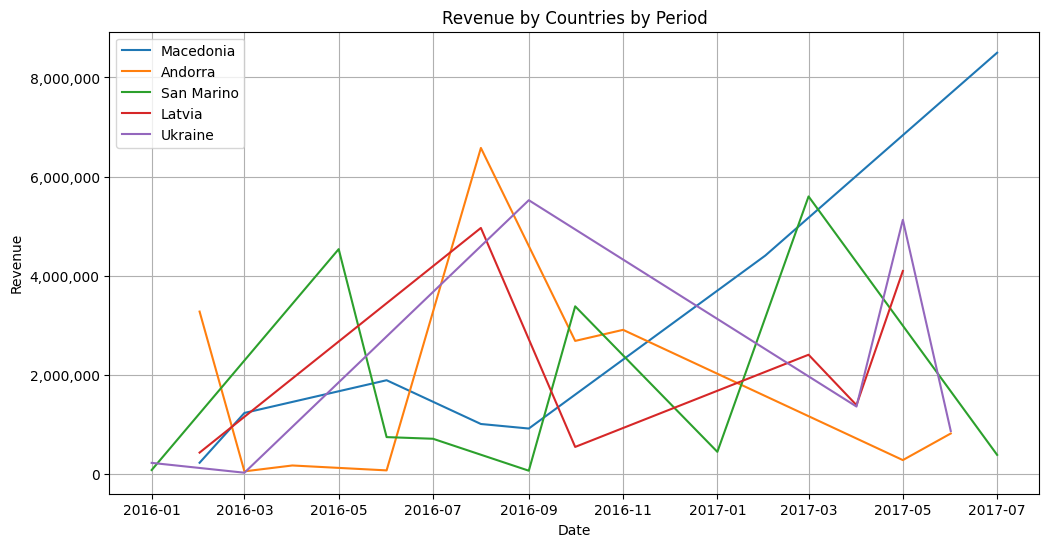

In [ ]:
# Build line chart
plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = top_revenue_country_by_month[top_revenue_country_by_month["country"] == country]
    plt.plot(country_data["order_month"], country_data["total_revenue"], label=country)

plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Revenue by Countries by Period")
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.legend()
plt.grid(True)
plt.show()

Let's build a third visualization of sales dynamics by region.

In [ ]:
#Group Revenue by Month
sales_data_by_month_region = df.groupby(['order_month','region'])["total_revenue"].sum().reset_index()

#Filtered dates by 2 last years and Exclude values from Unknown Region
sales_data_by_month_region_from2016 = sales_data_by_month_region[(sales_data_by_month_region['order_month'] >= '2016-01-01') & (sales_data_by_month_region['region'] != "Unknown")]
print(sales_data_by_month_region_from2016)

    order_month  region  total_revenue
157  2016-01-01  Europe    16365750.62
159  2016-02-01  Europe    11244644.13
161  2016-03-01    Asia     1981439.40
162  2016-03-01  Europe    11300999.46
164  2016-04-01  Europe     5904818.14
166  2016-05-01    Asia     1406875.92
167  2016-05-01  Europe    12094313.89
169  2016-06-01  Europe    13558548.06
170  2016-07-01  Europe    32774910.45
172  2016-08-01  Europe    20769776.86
173  2016-09-01  Europe    17442612.95
174  2016-10-01    Asia      144286.38
175  2016-10-01  Europe     6840299.02
176  2016-11-01    Asia     1228440.40
177  2016-11-01  Europe    13147450.76
179  2016-12-01    Asia     1482777.88
180  2016-12-01  Europe    13590145.53
182  2017-01-01    Asia     1020839.55
183  2017-01-01  Europe    15671418.84
184  2017-02-01    Asia     1084282.26
185  2017-02-01  Europe    19666930.06
186  2017-03-01  Europe    18462006.30
188  2017-04-01  Europe    14397482.38
189  2017-05-01  Europe    18808310.00
191  2017-06-01    Asia  

In [ ]:
regions = sales_data_by_month_region_from2016["region"].unique()
print(regions)

['Europe' 'Asia']


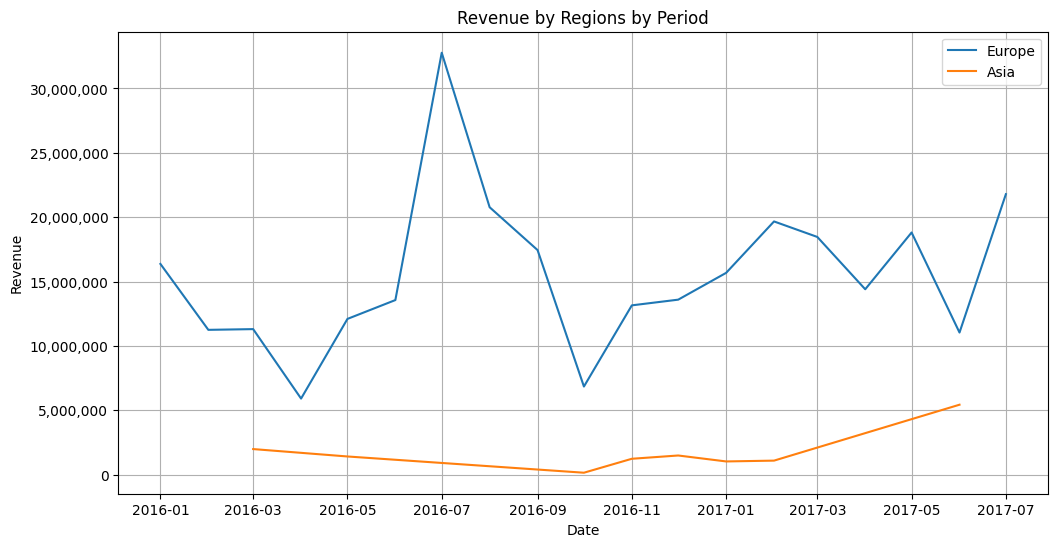

In [ ]:
# Build line chart
plt.figure(figsize=(12, 6))
for region in regions:
    region_data = sales_data_by_month_region_from2016[sales_data_by_month_region_from2016["region"] == region]
    plt.plot(region_data["order_month"], region_data["total_revenue"], label=region)

plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Revenue by Regions by Period")
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.legend()
plt.grid(True)
plt.show()

The dynamics of profit were different for different categories and different countries, that is, there is no general trend. In the breakdown of categories, we see significantly higher values ​​for the European region compared to Asia, but the dynamics are more wavy in Europe, and smoother in Asia.

**Will analyze product sales by day of the week.**

In [ ]:
# Create column week_day
df['week_day'] = df['order_date'].dt.day_name()

# Group orders by Day of Week

df_orders_week_day = df.groupby('week_day')['order_id'].count().reset_index()
df_orders_week_day.rename(columns={'order_id' : 'order_cnt'}, inplace=True)
print(df_orders_week_day)

    week_day  order_cnt
0     Friday        176
1     Monday        202
2   Saturday        201
3     Sunday        207
4   Thursday        167
5    Tuesday        183
6  Wednesday        194


In [ ]:
# Sort days of week

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_orders_week_day['week_day'] = pd.Categorical(df_orders_week_day['week_day'], categories=days, ordered=True)

df_sorted_week_day = df_orders_week_day.sort_values(by='week_day')
print(df_sorted_week_day)

    week_day  order_cnt
1     Monday        202
5    Tuesday        183
6  Wednesday        194
4   Thursday        167
0     Friday        176
2   Saturday        201
3     Sunday        207


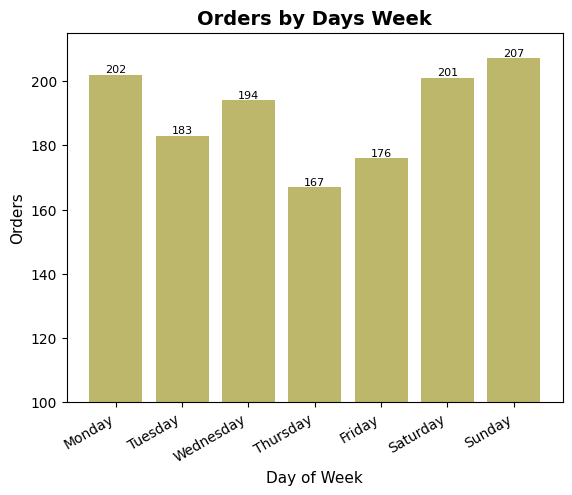

In [ ]:
# Build bar chart
bars = plt.bar(df_sorted_week_day['week_day'], df_sorted_week_day['order_cnt'], color="darkkhaki")
plt.title("Orders by Days Week", fontsize=14, fontweight="bold")
plt.xlabel("Day of Week", fontsize=11)
plt.xticks(rotation=30, ha="right")
plt.ylabel("Orders", fontsize=11)
plt.ylim(100, df_sorted_week_day['order_cnt'].max() +8)

# Add data labels
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.03,
        f"{bar.get_height()}",
        ha="center",
        va="bottom",
        color="black",
        fontsize=8,
    )
plt.show()

The most goods are ordered on Sunday, the least on Thursday.

Let's look at the distribution of order quantity values ​​by category.

In [ ]:
# Group Orders count by week days and Category
df_orders_category_week_day = df.groupby(['week_day', 'category'])['order_id'].count().reset_index()

# Sort day of Week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_orders_category_week_day['week_day'] = pd.Categorical(df_orders_category_week_day['week_day'], categories=days, ordered=True)

df_sorted_category_week_day = df_orders_category_week_day.sort_values(by='week_day')

# Build Pivot Table
pivot_table = pd.pivot_table(df_sorted_category_week_day, values = 'order_id', index = 'week_day', columns = 'category', observed=False)
print(pivot_table)

category   Baby Food  Beverages  Cereal  Clothes  Cosmetics  Fruits  \
week_day                                                              
Monday          17.0       21.0    12.0     13.0       12.0    19.0   
Tuesday         16.0       18.0    14.0     21.0       16.0    14.0   
Wednesday       16.0       16.0    16.0     12.0       17.0    14.0   
Thursday        13.0       18.0    13.0     14.0       15.0    10.0   
Friday          16.0       12.0    12.0     10.0       28.0     8.0   
Saturday        19.0       15.0    21.0     16.0       14.0    23.0   
Sunday          15.0       21.0    15.0     19.0       12.0    24.0   

category   Household  Meat  Office Supplies  Personal Care  Snacks  Vegetables  
week_day                                                                        
Monday          19.0  20.0             15.0           13.0    21.0        20.0  
Tuesday          6.0  18.0             15.0           16.0    15.0        14.0  
Wednesday       22.0  16.0          

Using the pivot table, we can see the distribution of values ​​by product category. The distribution of the number of orders is even in most categories (Meat, Vegetables, Personal Care, Baby Food, etc.). In some categories, we observe the lowest sales on certain days: Houshold on Tuesday, and Fruits on Friday. Conversely, in the Fruits category, the most orders are made on weekends.